In [26]:

# import libraries for use 

import prophet
from prophet import Prophet
import pandas as pd
from matplotlib import pyplot
from pandas import to_datetime
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.graph_objs as go
import plotly.express as px


In [27]:
# import CSV data file

df = pd.read_csv("C:\\Users\\Nhowell.KUMAR\\Desktop\\Trucks v1.csv")

# Show first five of table

df.head(5)

,Week_Ending,Vehicle,Beginning_Mileage,Ending_Mileage,Total_Miles,Office,Year,Make,Model
0,10/2/2021,147,211705,211947,242,DN,2008,Chevy,Silverado
1,10/23/2021,147,212838,212893,55,DN,2008,Chevy,Silverado
2,1/1/2022,147,212893,212923,30,DN,2008,Chevy,Silverado
3,1/29/2022,147,212963,213013,50,DN,2008,Chevy,Silverado
4,2/5/2022,147,213013,213063,50,DN,2008,Chevy,Silverado


In [28]:
# Data types

df.dtypes

df.Week_Ending = df.Week_Ending.astype(str)
df.Vehicle = df.Vehicle.astype(str)
df.Beginning_Mileage = df.Beginning_Mileage.astype(int)
df.Ending_Mileage = df. Ending_Mileage.astype(int)
df.Total_Miles = df.Total_Miles.astype(int)
df.Office = df.Office.astype(str)
df.Year = df.Year.astype(str)
df.Make = df.Make.astype(str)
df.Model = df.Model.astype(str)


In [29]:
# Total rows and columns -- 1550 rows, 9 columns

df.shape

(1501, 9)

In [30]:
# How many duplicate rows -- 0,9

dupliacte_rows_df = df[df.duplicated()]
print("The number of duplicate rows: ", dupliacte_rows_df.shape)

The number of duplicate rows:  (0, 9)


In [31]:
# Total number of rows in data set 

df.count()

Week_Ending          1501
Vehicle              1501
Beginning_Mileage    1501
Ending_Mileage       1501
Total_Miles          1501
Office               1501
Year                 1501
Make                 1501
Model                1501
dtype: int64

In [32]:
# Find the nulls

print(df.isnull().sum())

Week_Ending          0
Vehicle              0
Beginning_Mileage    0
Ending_Mileage       0
Total_Miles          0
Office               0
Year                 0
Make                 0
Model                0
dtype: int64


In [33]:
# Descriptive data of the Total_Miles Column across all offices

df.describe()[['Total_Miles']]

,Total_Miles
count,1501.000000
mean,418.951366
std,244.025465
min,4.000000
25%,245.000000
50%,381.000000
75%,556.000000
max,1980.000000


In [34]:


fig = px.histogram(df, x='Total_Miles', title = "Count of Total Miles Driven per Week")
fig.show()

In [35]:
fig2 = px.box(df, y='Total_Miles', title = "Box Plot for Total Miles Driven per Week")
fig2.show()

In [36]:
fig3 = px.scatter(df, x='Vehicle', y='Total_Miles', color = 'Office',
                  labels={
                      'Vehicle': "Vehicle Number",
                      'Total_Miles': "Total Miles per Week",
                      'Office': "Office",
                  }, title = "Scatter Plot of Total Miles Driven by Each Truck, Per Week",)
fig3.show()

In [37]:
DN = df[df["Office"].str.contains('DN')]
PK = df[df["Office"].str.contains('PK')]
FC = df[df["Office"].str.contains('FC')]
CS = df[df["Office"].str.contains('CS')]
GS = df[df["Office"].str.contains('GS')]
SC = df[df["Office"].str.contains('SC')]

In [39]:
DN1 = px.histogram(DN, x='Total_Miles', title = "Count of Total Miles Driven of Denver Trucks per Week")
DN1.show()

In [40]:
PK1 = px.histogram(PK, x='Total_Miles', title = "Count of Total Miles Driven of Parker Trucks per Week")
PK1.show()

In [41]:
FC1 = px.histogram(FC, x='Total_Miles', 
                   title = "Count of Total Miles Driven of Fort Collins Trucks per Week")
FC1.show()

In [42]:
CS1 = px.histogram(CS, x='Total_Miles', 
                   title = "Count of Total Miles Driven of Colorado Springs Trucks per Week")
CS1.show()

In [43]:
GS1 = px.histogram(GS, x='Total_Miles',
                   title = "Count of Total Miles Driven of Glenwood Springs Trucks per Week")
GS1.show()

In [44]:
SC1 = px.histogram(SC, x='Total_Miles', 
                   title = "Count of Total Miles Driven of Summit County Trucks per Week")
SC1.show()

In [45]:
DN2 = px.box(DN, y='Total_Miles', title = "Box Plot for Total Miles Driven per Week for Denver")
DN2.show()

In [46]:
PK2 = px.box(PK, y='Total_Miles', title = "Box Plot for Total Miles Driven per Week for Parker")
PK2.show()

In [47]:
FC2 = px.box(FC, y='Total_Miles', title = "Box Plot for Total Miles Driven per Week for Fort Collins")
FC2.show()

In [48]:
fig2 = px.box(CS, y='Total_Miles', title = "Box Plot for Total Miles Driven per Week for Colorado Springs")
fig2.show()

In [49]:
GS2 = px.box(GS, y='Total_Miles', title = "Box Plot for Total Miles Driven per Week for Glenwood Springs")
GS2.show()

In [50]:
SC2 = px.box(SC, y='Total_Miles', title = "Box Plot for Total Miles Driven per Week for Summit County")
SC2.show()

In [52]:
DN3 = px.scatter(x=DN['Vehicle'], y=DN['Total_Miles'],
                  labels={
                      'Vehicle': "Vehicle Number",
                      'Total_Miles': "Total Miles per Week",
                  }, title = "Scatter Plot of Total Miles Driven by Denver Trucks, Per Week")
DN3.show()

In [53]:
PK3 = px.scatter(x=PK['Vehicle'], y=PK['Total_Miles'],
                  labels={
                      'Vehicle': "Vehicle Number",
                      'Total_Miles': "Total Miles per Week",
                  }, title = "Scatter Plot of Total Miles Driven by Parker Trucks, Per Week") 
PK3.show()

In [54]:
FC3 = px.scatter(x=FC['Vehicle'], y=FC['Total_Miles'],
                  labels={
                      'Vehicle': "Vehicle Number",
                      'Total_Miles': "Total Miles per Week",
                  }, title = "Scatter Plot of Total Miles Driven by Fort Collins Trucks, Per Week")
FC3.show()

In [55]:
CS3 = px.scatter(x=CS['Vehicle'], y=CS['Total_Miles'],
                  labels={
                      'Vehicle': "Vehicle Number",
                      'Total_Miles': "Total Miles per Week",
                  }, title = "Scatter Plot of Total Miles Driven by Colorado Springs Trucks, Per Week") 
CS3.show()

In [56]:
GS3 = px.scatter(x=GS['Vehicle'], y=GS['Total_Miles'],
                  labels={
                      'Vehicle': "Vehicle Number",
                      'Total_Miles': "Total Miles per Week",
                  }, title = "Scatter Plot of Total Miles Driven by Glenwood Springs Trucks, Per Week")
GS3.show()

In [57]:
SC3 = px.scatter(x=SC['Vehicle'], y=SC['Total_Miles'],
                  labels={
                      'Vehicle': "Vehicle Number",
                      'Total_Miles': "Total Miles per Week",
                  }, title = "Scatter Plot of Total Miles Driven by Summit County Trucks, Per Week")
SC3.show()

In [58]:
# upload data
df = pd.read_csv("C:\\Users\\Nhowell.KUMAR\\Desktop\\187_Truck.csv")

# convert date to index, for clear plotting. 
df["Week_Ending"] = df["Week_Ending"].astype('datetime64[ns]')

# linear interpolation for missing values
df1 = df["Ending_Mileage"].interpolate(method = 'linear')

In [59]:
# Adding the linear interpolation values back into the dataframe. 
list_df = []
for i in df1:
    list_df.append(i)
print(list_df)
df1 = pd.DataFrame(list_df, columns = ['Pred_Ending_Mileage'])
df = pd.concat([df, df1], axis =1).reindex(df.index)
df = df.drop("Ending_Mileage", axis = 1)

[nan, 134125.0, 134770.0, 135171.0, 135687.0, 136120.0, 136515.0, 136882.0, 137022.0, 137351.0, 137477.0, 137557.0, 137733.5, 137910.0, 138086.5, 138263.0, 138483.0, 138760.0, 138885.66666666666, 139011.33333333334, 139137.0, 139266.0, 139641.0, 139965.0, 140078.0, 140680.0, 141298.0, 141678.0, 142074.0]


In [60]:
df.to_csv('Interpolate_187.csv', index = False)

In [61]:
# reupload of data. Not necessary, you can reset the index or skip the last plot. 
# We just need the date column to be the dates and not the index. 

df = pd.read_csv("C:\\Users\\Nhowell.KUMAR\\Desktop\\Interpolate_187.csv")

# print shape of data (rows, columns)
print(df.shape)

# print first five rows of data
print(df.head())

(29, 2)
  Week_Ending  Pred_Ending_Mileage
0  2021-10-02                  NaN
1  2021-10-09             134125.0
2  2021-10-16             134770.0
3  2021-10-23             135171.0
4  2021-10-30             135687.0


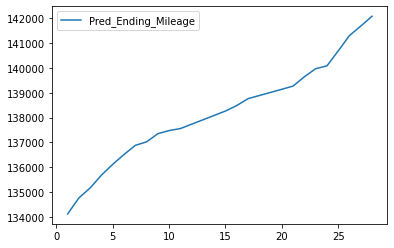

In [62]:
# calling the dataframe I want to plot
df1.plot()

# showing the plot for the data frame
pyplot.show()

In [63]:


# Prophet uses default column calls/names. ds is your date column, y is in this case mileage
df.columns = ["ds", "y"]

# convert the date column to date time format
df["ds"] = to_datetime(df["ds"])

# call the model we will be using Prophet
model = Prophet()

# fit the model to our data or data frame
model.fit(df)

#  future is our variable for extrapolating the model out to predict future values. The periods
# can be adjusted to predict further and further into the future. I have manipulated it to reflect 
# approx. when the truck will hit 200,000 miles. 

future = model.make_future_dataframe(periods = 1000)

# print the last 5 rows of the future data

print(future.tail())

# forecast is the forecasted data for our predictive model. 

forecast = model.predict(future)

# ds=date, yhat=future predicted value, yhat_lower= the lower range predicted value, 
# yhat_upper = upper range of predicted value. 

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 21.


             ds
1024 2025-01-06
1025 2025-01-07
1026 2025-01-08
1027 2025-01-09
1028 2025-01-10


,ds,yhat,yhat_lower,yhat_upper
1024,2025-01-06,202660.416492,135106.576280,275816.189764
1025,2025-01-07,202721.268970,135127.126917,276005.252255
1026,2025-01-08,202782.121448,135093.089391,276197.521227
1027,2025-01-09,202842.973926,135002.713713,276283.990375
1028,2025-01-10,202903.826405,134938.778206,276495.460627


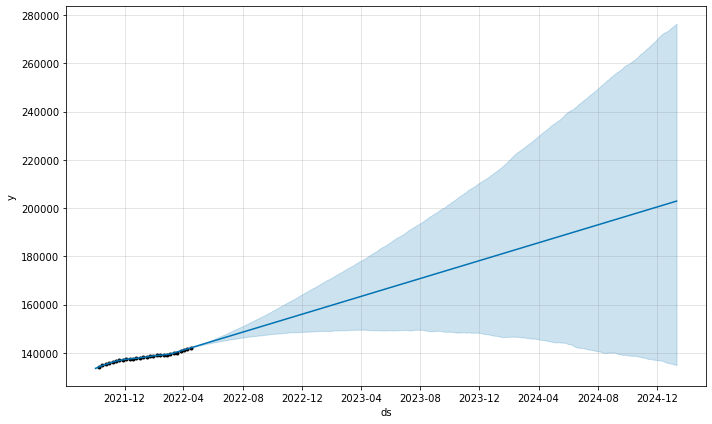

In [64]:
# create plot of forecasted values. Non-interactive. 

fig1 = model.plot(forecast)

In [65]:
# create plot of forecasted values. Interactive.

plot_plotly(model, forecast)

In [66]:
# upload data
df = pd.read_csv("C:\\Users\\Nhowell.KUMAR\\Desktop\\191_Truck.csv")

# convert date to index, for clear plotting. 
df["Week_Ending"] = df["Week_Ending"].astype('datetime64[ns]')

# linear interpolation for missing values
df1 = df["Ending_Mileage"].interpolate(method = 'linear')

In [67]:
# Adding the linear interpolation values back into the dataframe. 
list_df = []
for i in df1:
    list_df.append(i)
print(list_df)
df1 = pd.DataFrame(list_df, columns = ['Pred_Ending_Mileage'])
df = pd.concat([df, df1], axis =1).reindex(df.index)
df = df.drop("Ending_Mileage", axis = 1)

[nan, 218940.0, 219868.0, 219962.0, 220940.0, 221720.0, 222380.0, 223310.0, 223720.0, 224220.0, 224940.0, 225600.0, 226050.0, 226450.0, 227050.0, 227790.0, 228150.0, 228450.0, 228840.0, 230040.0, 230333.33333333334, 230626.66666666666, 230920.0, 231260.0, 231850.0, 232330.0, 232330.0, 232330.0, 232330.0]


In [68]:
df.to_csv('Interpolate_191.csv', index = False)

In [69]:
# reupload of data. Not necessary, you can reset the index or skip the last plot. 
# We just need the date column to be the dates and not the index. 

df = pd.read_csv("C:\\Users\\Nhowell.KUMAR\\Desktop\\Interpolate_191.csv")

# print shape of data (rows, columns)
print(df.shape)

# print first five rows of data
print(df.head())

(29, 2)
  Week_Ending  Pred_Ending_Mileage
0  2021-10-02                  NaN
1  2021-10-09             218940.0
2  2021-10-16             219868.0
3  2021-10-23             219962.0
4  2021-10-30             220940.0


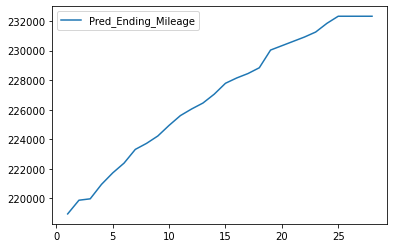

In [70]:
# calling the dataframe I want to plot
df.plot()

# showing the plot for the data frame
pyplot.show()

In [71]:


# Prophet uses default column calls/names. ds is your date column, y is in this case mileage
df.columns = ["ds", "y"]

# convert the date column to date time format
df["ds"] = to_datetime(df["ds"])

# call the model we will be using Prophet
model = Prophet()

# fit the model to our data or data frame
model.fit(df)

#  future is our variable for extrapolating the model out to predict future values. The periods
# can be adjusted to predict further and further into the future. I have manipulated it to reflect 
# approx. when the truck will hit 200,000 miles. 

future = model.make_future_dataframe(periods = 2000)

# print the last 5 rows of the future data

print(future.tail())

# forecast is the forecasted data for our predictive model. 

forecast = model.predict(future)

# ds=date, yhat=future predicted value, yhat_lower= the lower range predicted value, 
# yhat_upper = upper range of predicted value. 

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 21.


             ds
2024 2027-10-03
2025 2027-10-04
2026 2027-10-05
2027 2027-10-06
2028 2027-10-07


,ds,yhat,yhat_lower,yhat_upper
2024,2027-10-03,304905.877091,-295605.216563,833404.124880
2025,2027-10-04,304942.073465,-296230.885661,833917.958483
2026,2027-10-05,304978.269840,-296627.271354,834320.148394
2027,2027-10-06,305014.466215,-297414.430299,835134.897477
2028,2027-10-07,305050.662590,-297684.667970,835394.718157


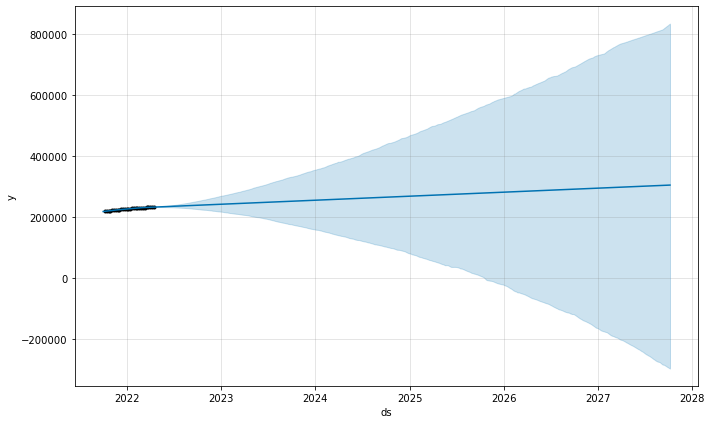

In [72]:
# create plot of forecasted values. Non-interactive. 

fig1 = model.plot(forecast)

In [73]:
# create plot of forecasted values. Interactive.

plot_plotly(model, forecast)

In [74]:
# upload data
df = pd.read_csv("C:\\Users\\Nhowell.KUMAR\\Desktop\\222_Truck.csv")

# convert date to index, for clear plotting. 
df["Week_Ending"] = df["Week_Ending"].astype('datetime64[ns]')

# linear interpolation for missing values
df1 = df["Ending_Mileage"].interpolate(method = 'linear')

In [75]:
# Adding the linear interpolation values back into the dataframe. 
list_df = []
for i in df1:
    list_df.append(i)
print(list_df)
df1 = pd.DataFrame(list_df, columns = ['Pred_Ending_Mileage'])
df = pd.concat([df, df1], axis =1).reindex(df.index)
df = df.drop("Ending_Mileage", axis = 1)

[35741.0, 36163.0, 36490.0, 36982.0, 37688.0, 37949.666666666664, 38211.333333333336, 38473.0, 38734.666666666664, 38996.333333333336, 39258.0, 39818.5, 40379.0, 40684.0, 41188.0, 41725.5, 42263.0, 42792.0, 43124.0, 43646.0, 44168.0, 44299.0, 44841.0, 45433.0, 46078.0, 46839.0, 47638.0, 47638.0, 47638.0]


In [76]:
df.to_csv('Interpolate_222.csv', index = False)

In [77]:
# reupload of data. Not necessary, you can reset the index or skip the last plot. 
# We just need the date column to be the dates and not the index. 

df = pd.read_csv("C:\\Users\\Nhowell.KUMAR\\Desktop\\Interpolate_222.csv")

# print shape of data (rows, columns)
print(df.shape)

# print first five rows of data
print(df.head())

(29, 2)
  Week_Ending  Pred_Ending_Mileage
0  2021-10-02              35741.0
1  2021-10-09              36163.0
2  2021-10-16              36490.0
3  2021-10-23              36982.0
4  2021-10-30              37688.0


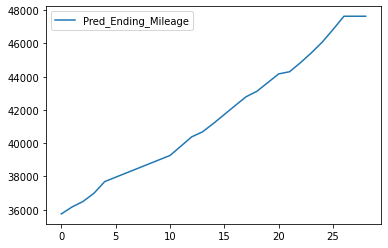

In [78]:
# calling the dataframe I want to plot
df.plot()

# showing the plot for the data frame
pyplot.show()

In [79]:


# Prophet uses default column calls/names. ds is your date column, y is in this case mileage
df.columns = ["ds", "y"]

# convert the date column to date time format
df["ds"] = to_datetime(df["ds"])

# call the model we will be using Prophet
model = Prophet()

# fit the model to our data or data frame
model.fit(df)

#  future is our variable for extrapolating the model out to predict future values. The periods
# can be adjusted to predict further and further into the future. I have manipulated it to reflect 
# approx. when the truck will hit 200,000 miles. 

future = model.make_future_dataframe(periods = 1500)

# print the last 5 rows of the future data

print(future.tail())

# forecast is the forecasted data for our predictive model. 

forecast = model.predict(future)

# ds=date, yhat=future predicted value, yhat_lower= the lower range predicted value, 
# yhat_upper = upper range of predicted value. 

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 22.


             ds
1524 2026-05-21
1525 2026-05-22
1526 2026-05-23
1527 2026-05-24
1528 2026-05-25


,ds,yhat,yhat_lower,yhat_upper
1524,2026-05-21,156546.650709,111253.754111,198438.953304
1525,2026-05-22,156619.141229,111216.569503,198353.928597
1526,2026-05-23,156691.631748,111213.655473,198866.840832
1527,2026-05-24,156764.122268,111213.763063,198889.835571
1528,2026-05-25,156836.612788,111177.836409,199009.774375


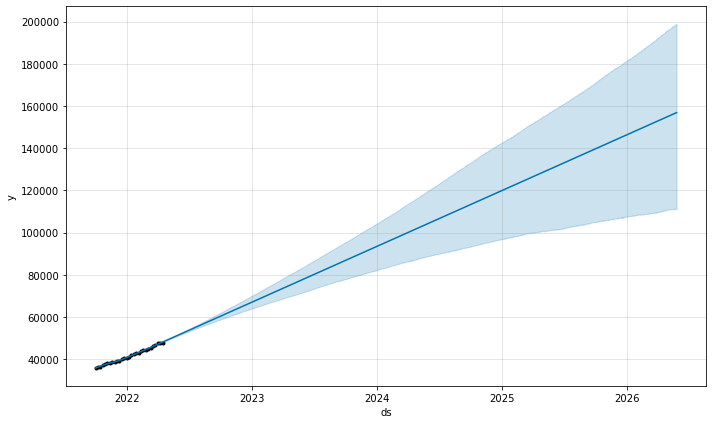

In [80]:
# create plot of forecasted values. Non-interactive. 

fig1 = model.plot(forecast)

In [81]:
# create plot of forecasted values. Interactive.

plot_plotly(model, forecast)

In [82]:
# upload data
df = pd.read_csv("C:\\Users\\Nhowell.KUMAR\\Desktop\\241_Truck.csv")

# convert date to index, for clear plotting. 
df["Week_Ending"] = df["Week_Ending"].astype('datetime64[ns]')

# linear interpolation for missing values
df1 = df["Ending_Mileage"].interpolate(method = 'linear')

In [83]:
# Adding the linear interpolation values back into the dataframe. 
list_df = []
for i in df1:
    list_df.append(i)
print(list_df)
df1 = pd.DataFrame(list_df, columns = ['Pred_Ending_Mileage'])
df = pd.concat([df, df1], axis =1).reindex(df.index)
df = df.drop("Ending_Mileage", axis = 1)

[26484.0, 26768.0, 27085.0, 27276.0, 27611.0, 28008.0, 28262.0, 28541.0, 28858.0, 29307.0, 29615.0, 30026.0, 30400.0, 30646.0, 30797.0, 30979.0, 31178.0, 31611.0, 31961.0, 32425.0, 32809.0, 32919.0, 33323.0, 33637.0, 33736.0, 34047.0, 34047.0, 34047.0, 34047.0]


In [84]:
df.to_csv('Interpolate_241.csv', index = False)

In [85]:
# reupload of data. Not necessary, you can reset the index or skip the last plot. 
# We just need the date column to be the dates and not the index. 

df = pd.read_csv("C:\\Users\\Nhowell.KUMAR\\Desktop\\Interpolate_241.csv")

# print shape of data (rows, columns)
print(df.shape)

# print first five rows of data
print(df.head())

(29, 2)
  Week_Ending  Pred_Ending_Mileage
0  2021-10-02              26484.0
1  2021-10-09              26768.0
2  2021-10-16              27085.0
3  2021-10-23              27276.0
4  2021-10-30              27611.0


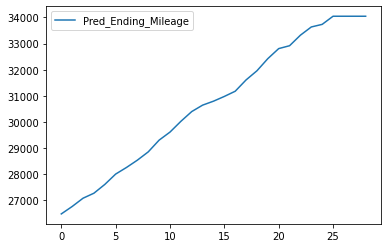

In [86]:
# calling the dataframe I want to plot
df.plot()

# showing the plot for the data frame
pyplot.show()

In [87]:


# Prophet uses default column calls/names. ds is your date column, y is in this case mileage
df.columns = ["ds", "y"]

# convert the date column to date time format
df["ds"] = to_datetime(df["ds"])

# call the model we will be using Prophet
model = Prophet()

# fit the model to our data or data frame
model.fit(df)

#  future is our variable for extrapolating the model out to predict future values. The periods
# can be adjusted to predict further and further into the future. I have manipulated it to reflect 
# approx. when the truck will hit 200,000 miles. 

future = model.make_future_dataframe(periods = 1000)

# print the last 5 rows of the future data

print(future.tail())

# forecast is the forecasted data for our predictive model. 

forecast = model.predict(future)

# ds=date, yhat=future predicted value, yhat_lower= the lower range predicted value, 
# yhat_upper = upper range of predicted value. 

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 22.


             ds
1024 2025-01-06
1025 2025-01-07
1026 2025-01-08
1027 2025-01-09
1028 2025-01-10


,ds,yhat,yhat_lower,yhat_upper
1024,2025-01-06,52715.741217,9746.802120,96155.319528
1025,2025-01-07,52734.313051,9727.590721,96238.250100
1026,2025-01-08,52752.884886,9674.707554,96400.688767
1027,2025-01-09,52771.456721,9548.110728,96488.804180
1028,2025-01-10,52790.028555,9568.887707,96568.934917


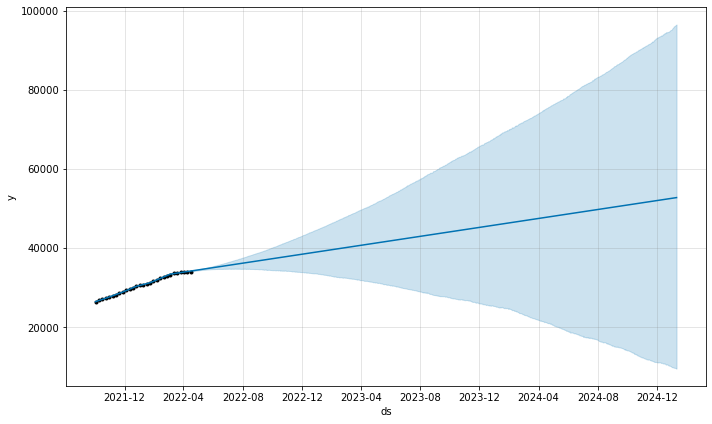

In [88]:
# create plot of forecasted values. Non-interactive. 

fig1 = model.plot(forecast)

In [89]:
# create plot of forecasted values. Interactive.

plot_plotly(model, forecast)